# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
#libraries to read and manipulate data
import numpy as np
import pandas as pd

#libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for model building and tuning
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier,RandomForestClassifier, 
                              GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier)
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#libraries for metrics and statistics
from sklearn import metrics
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [136]:
!jupyter nbconvert -- to html DSBA_Project_ET_EasyVisa_Solution_Notebook.ipynb

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'html' matched no files
[NbConvertApp] Converting notebook DSBA_Project_ET_EasyVisa_Solution_Notebook.ipynb to html
[NbConvertApp] Writing 1325053 bytes to DSBA_Project_ET_EasyVisa_Solution_Notebook.html


In [3]:
# read the data
ds = pd.read_csv('/content/drive/MyDrive/Python Project/EasyVisa.csv')

## Data Overview

- Observations
- Sanity checks

In [4]:
# copying data to another variable to avoid any changes to original data
data = ds.copy()

In [5]:
# view the first 5 rows
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
# view the last 5 rows
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [7]:
#check the shape of the dataframe
data.shape

(25480, 12)

In [8]:
print('The dataframe has', data.shape[0], 'rows and', data.shape[1],'columns.')

The dataframe has 25480 rows and 12 columns.


In [9]:
# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Observation:
* There are 12 columns with 25480 total entries with no misssing values as can be seen from number of non-null values.
* There are 9 object datatype columns, 1 float column and 2 integer columns.

In [10]:
# convert all columns with dtype object into category
for col in data.columns[data.dtypes=='object']:
    data[col] = data[col].astype('category')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


* All object datatypes have been converted to category datatypes.

In [12]:
# checking for duplicate values
data[data.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Observation:
* There are no duplicated rows or entries found in the datatset.

In [13]:
# drop case_id column as it does not impact our dataset
data.drop(["case_id"], axis=1, inplace=True)

In [14]:
# Check if the column case_id has been dropped
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Observation:
* The column case_id has been dropped.

In [15]:
# Check the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


### Observation:

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [16]:
# define function to combine boxplot and histogram on the same scale
def histogram_boxplot(ds, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    ds: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Number of rows of the subplot grid= 2, and x-axis will be shared among all subplots when sharex= True
    f, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True,gridspec_kw={"height_ratios": (0.25, 0.75)},figsize=figsize,)
    # create the 2 subplots 
    sns.boxplot(data=ds, x=feature, ax=ax_box, showmeans=True, color="violet")
    sns.histplot(data=ds, x=feature, kde=kde, ax=ax_hist, bins=bins) if bins else sns.histplot(data=ds, x=feature, kde=kde, ax=ax_hist)
    # Create the histogram and add the mean and median
    ax_hist.axvline(ds[feature].mean(), color="green", linestyle="--") 
    ax_hist.axvline(ds[feature].median(), color="black", linestyle="-") 

In [17]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    ds: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = ds[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+2,6))
    else:
        plt.figure(figsize=(n+2,6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=ds,
        x=feature,
        palette="Paired",
        order=ds[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  

In [18]:
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
  
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5,))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [19]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### 1. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


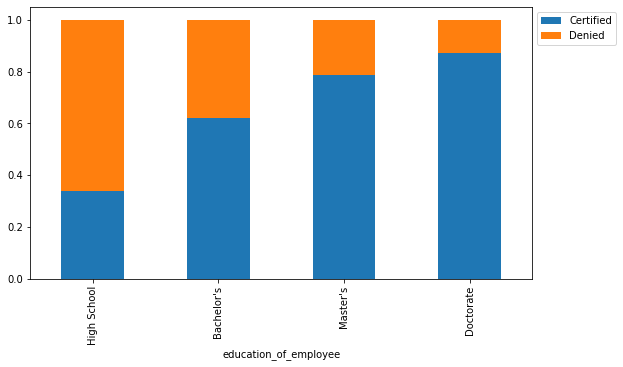

In [20]:
stacked_barplot(data, "education_of_employee", "case_status")

### Observation:
* From the above graph,we can see that the ratio of visa certification increases and denials reduces with level of education.
* Higher educational status increases chances of visa certification.

### 2. How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


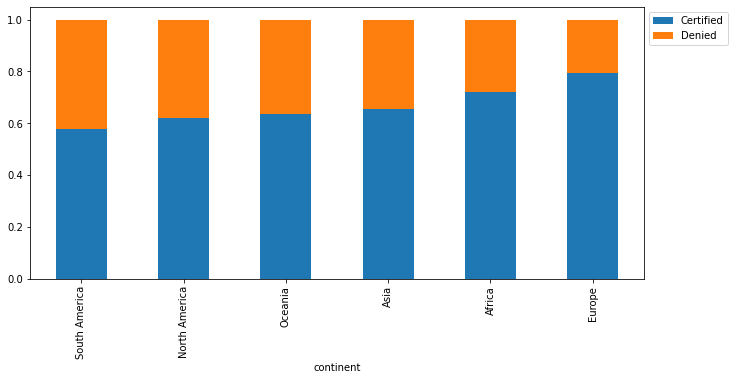

In [21]:
stacked_barplot(data, "continent", "case_status")

### Observation:
* Asia has the most number of applicants and for every 3 applicnts, 2 are certified and 1 is denied.
* Africa and oceania have the least number of applicants.
* Europe has the second largest number of applicants and also has the best ratio of certified to denied applications as 4 in 5 applicants are certified.

### 3.  Does work experience influence visa status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


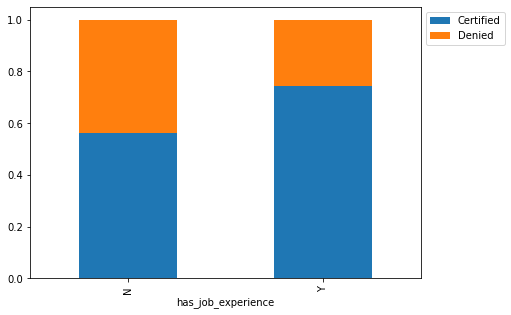

In [22]:
stacked_barplot(data, "has_job_experience", "case_status")

### Observation:
* From the above plotted graph, we can see that having work experience greatly increases your odds of Visa approval as the ratio of denied to approved applicants with experience is 3:1. 
* Applicants without work experience have approximately equal chances of approval or denial.

### 4.Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


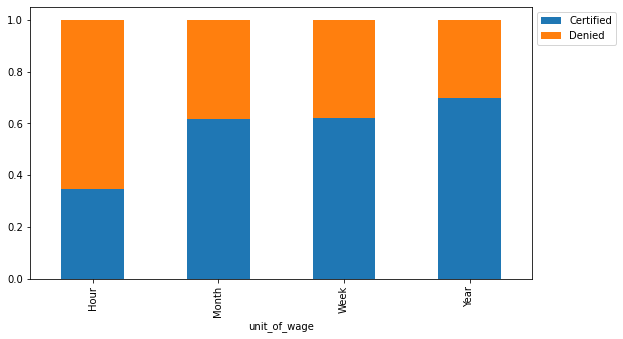

In [23]:
stacked_barplot(data, "unit_of_wage", "case_status")

### Observation:
* Applicants for jobs with  yearly wage payments are the majority group of visa applicants and they have an approval rate to denail ratio of ~2.3:1. 
* applicants for hourly paid jobs have a higher denial rate to approval with a ratio of ~1:2( for every 3 applicants, 2 are denied).

### 5. How does the visa status change with the prevailing wage?

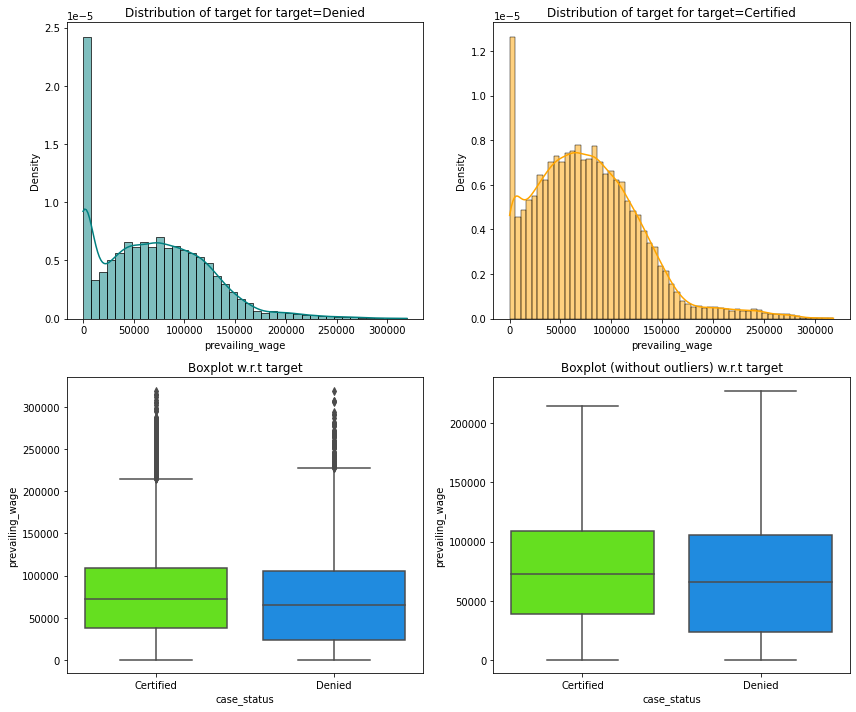

In [24]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

### Observation:
* The ratio of approval to denial is approximately equivalent accross all prevailing wage categories.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [25]:
# check for missing values
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Observation:
* There are no missing values.

###  Outlier detection and treatment

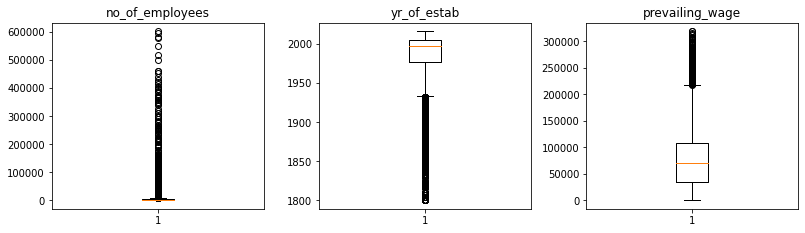

In [26]:
# outlier detection 
plt.figure(figsize=(15, 15))

for i, variable in enumerate(data.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observation:
* We will not be treating any outliers.

 ### Feature engineering 

In [27]:
data["unit_of_wage"] = data["unit_of_wage"].astype('object')
data.loc[data["unit_of_wage"]=="Hour", "unit_of_wage"] = "Hourly"
data.loc[data["unit_of_wage"]=="Week", "unit_of_wage"] = "Not_Hourly"
data.loc[data["unit_of_wage"]=="Month", "unit_of_wage"] = "Not_Hourly"
data.loc[data["unit_of_wage"]=="Year", "unit_of_wage"] = "Not_Hourly"
data["unit_of_wage"] = data["unit_of_wage"].astype('category')

In [28]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hourly,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Not_Hourly,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Not_Hourly,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Not_Hourly,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Not_Hourly,Y,Certified


In [29]:
data_hourly = data[data.unit_of_wage=='Hourly']

In [30]:
# Create bins for hourly to be able to categorize applicants by income per day
bins = list(np.arange(0,1100,200))
data_hourly['income_per_day'] = pd.cut(data_hourly['prevailing_wage'], bins)

In [31]:
data_annually = data[data.unit_of_wage=='Not_Hourly']

In [32]:
# Create bins for not hourly to be able to categorize applicants applying for jobs with non hourly pay.
bins = [0,25000,50000,75000,100000,125000,np.inf]
names = ['$0-25k','$25k-50k','$50k-75k','$75k-100k','$100k-125k','$125k+']
data_annually['income_per_year'] = pd.cut(data_annually['prevailing_wage'], bins)

In [33]:
# Let's look at the column no of employees
data = data[data.no_of_employees>0]
data.shape

(25447, 11)

In [34]:
#create bins to categorize companies by the size of their total workforce
bins = [0,1000,2000,3000,4000,np.Inf]
names = ['micro_sized(0-1000)','small_sized(1000-2000)','medium_sized(2000-3000)','large(3000-4000)','very_large(4000+)']
#assign bins to categorize the companies by employee size
data['company_size'] = pd.cut(data['no_of_employees'], bins, labels=names)
data["company_size"] = data["company_size"].astype("category")
data.company_size.value_counts()

micro_sized(0-1000)        6208
small_sized(1000-2000)     5915
medium_sized(2000-3000)    4978
very_large(4000+)          4798
large(3000-4000)           3548
Name: company_size, dtype: int64

In [35]:
#create bins to categorize companies by number of years since establishment
bins = [0,1966,1986,1996,2006,np.Inf]
names = ['50+','30-50','20-30','10-20','0-10']
#assign bins to categorize the companies by company age
data['age_of_company'] = pd.cut(data['yr_of_estab'], bins, labels=names)

In [36]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_size,age_of_company
0,Asia,High School,N,N,14513,2007,West,592.2029,Hourly,Y,Denied,very_large(4000+),0-10
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Not_Hourly,Y,Certified,medium_sized(2000-3000),10-20
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Not_Hourly,Y,Denied,very_large(4000+),0-10
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Not_Hourly,Y,Denied,micro_sized(0-1000),50+
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Not_Hourly,Y,Certified,small_sized(1000-2000),10-20


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25447 non-null  category
 1   education_of_employee  25447 non-null  category
 2   has_job_experience     25447 non-null  category
 3   requires_job_training  25447 non-null  category
 4   no_of_employees        25447 non-null  int64   
 5   yr_of_estab            25447 non-null  int64   
 6   region_of_employment   25447 non-null  category
 7   prevailing_wage        25447 non-null  float64 
 8   unit_of_wage           25447 non-null  category
 9   full_time_position     25447 non-null  category
 10  case_status            25447 non-null  category
 11  company_size           25447 non-null  category
 12  age_of_company         25447 non-null  category
dtypes: category(10), float64(1), int64(2)
memory usage: 1.0 MB


## EDA

- It is a good idea to explore the data once again after manipulating it.

### Univariate analysis

#### Observations on number of employees

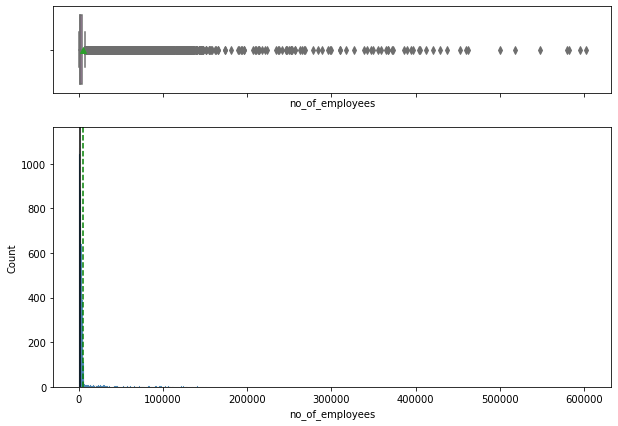

In [38]:
histogram_boxplot(data, "no_of_employees")

### Observation:
* The graph above is heavily right skewed.

#### Observations on year of establishment

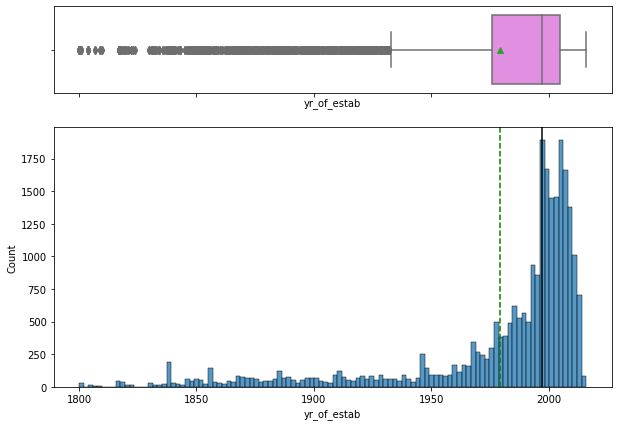

In [39]:
histogram_boxplot(data, "yr_of_estab")

### Observation:
* The graph above shows that the distribution of year of establishment is heavily left skewed.

#### Observations on prevailing_wage and unit_of_wage

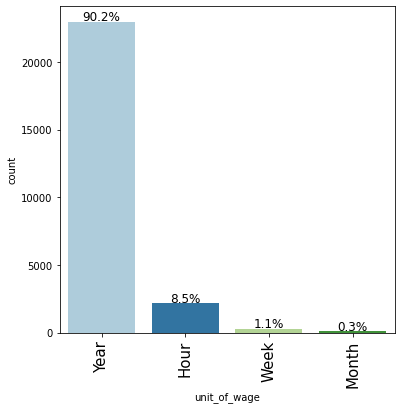

In [40]:
labeled_barplot(data, "unit_of_wage", perc=True);

### Observation:
* 90.2% of all jobs being applied for have a yearly unit of wage, whilst 8.5% of the jobs aplied to by appiants are paid hourly.
* Weekly and montly paid jobs have very minute percentages.

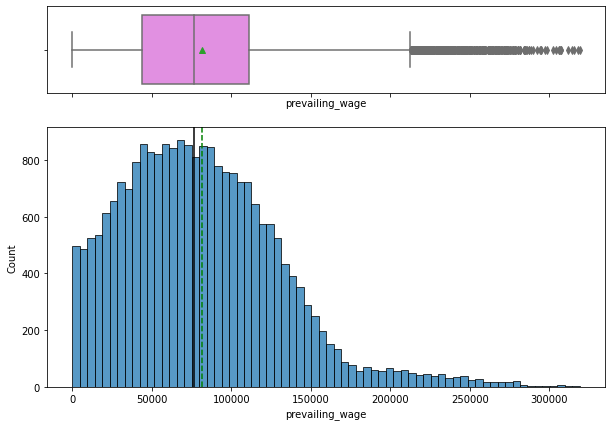

In [41]:
histogram_boxplot(data[(data["unit_of_wage"]=="Not_Hourly")], "prevailing_wage")

### Observation:
* From te above graph, we see that the median and mean wage for yearly paid jobs is within ~70,000 to 80,000 USD, with certain jobs paying up to as much as 200,000 - 300,000 USD and some jobs paying as low as <50,000 USD.

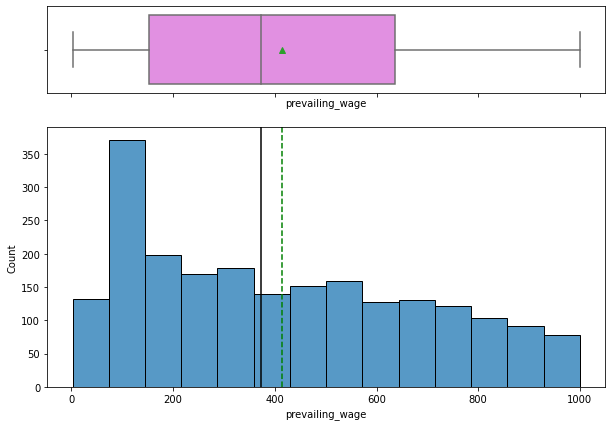

In [42]:
histogram_boxplot(data[(data["unit_of_wage"]=="Hourly")], "prevailing_wage")

### Observation:
*  From te above graph, we see that the median and mean wage for hourly paid jobs is 400 USD, with certain jobs paying up to as much as 1,000 USD hourly, which seems a little too high.
* from the above findings, we can assume that the prevailing wages for jobs with hourly unit of pay is compiled and calculated on a weekly basis.

### Observation on visa application by continent

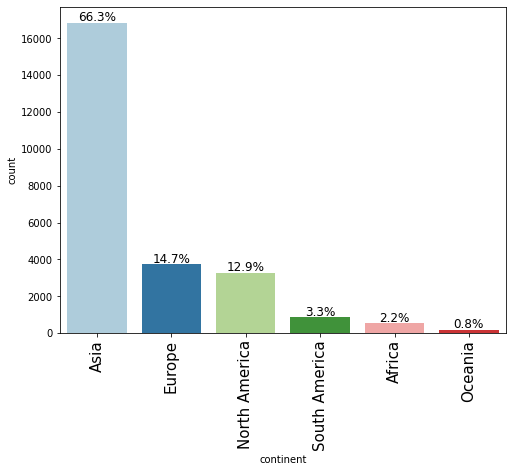

In [43]:
labeled_barplot(data, "continent", perc=True)

### Observation:
* Asia has the highest percentage of applicants (66.3%), and the least number of aplicants come from Oceania and then Africa.

### Observations on educational qualification

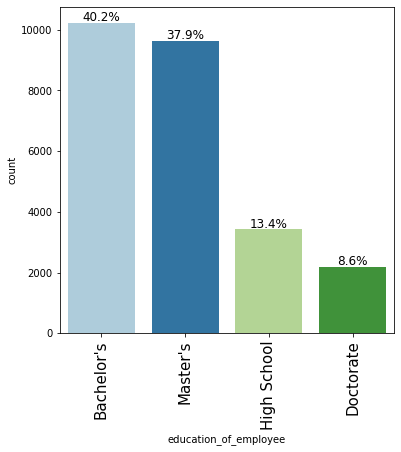

In [44]:
labeled_barplot(data, "education_of_employee", perc=True)

### Observation:
* Majority of employees either have a bachelor's degree or a master's degree, with the least percentage of employees having a doctorate degree.

### Observations on job_experience

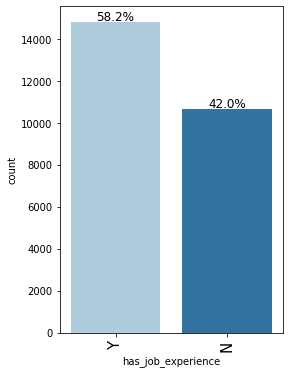

In [45]:
labeled_barplot(data, "has_job_experience", perc=True)

### Observation:
* 58.2% of employees who apply for jobs have previous work experiences and 42% don't.

### Observations on requires_training

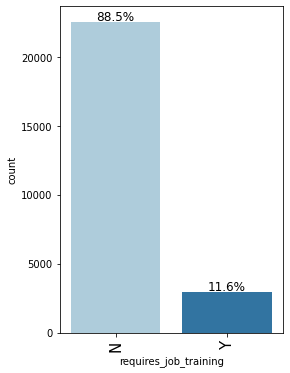

In [46]:
labeled_barplot(data, "requires_job_training", perc=True)

### Observation:
* 88% of the employees do not require job training and only 11.6% do.
*  This could imply that some of the job positions do not require any experiences to fill as only 58% of employees have previous job experirnces but 88% of them do not require training.

### Observations on region_of_employment 

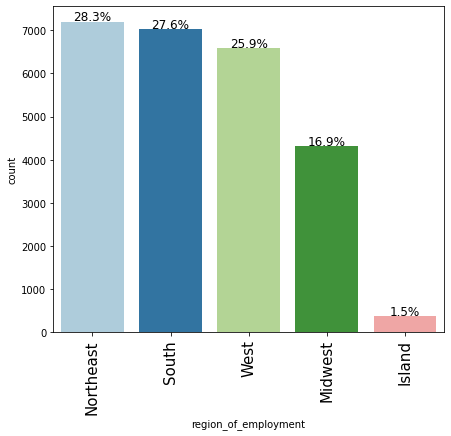

In [47]:
labeled_barplot(data, "region_of_employment", perc=True)

### Observation:
* The norteast, south and west are the regions where the highest number of intended employees would be employed.

### Observations on full_time_position

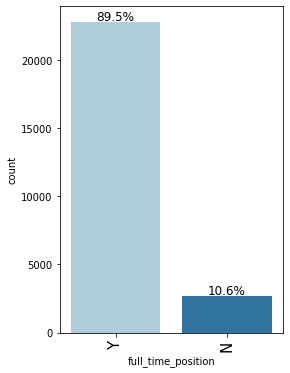

In [48]:
labeled_barplot(data, "full_time_position", perc=True)

* 89.5% of the jobs are full time jobs, whilst 10.6% of the jobs are part-time positions.

### Observations on case_status

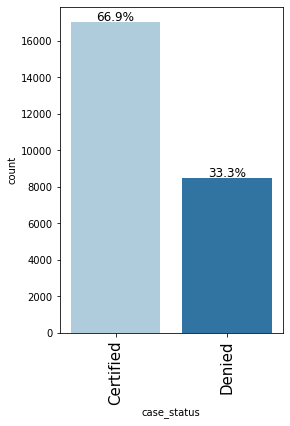

In [49]:
labeled_barplot(data, "case_status", perc=True)

### Observation:
* ~67% 0f applicants that applied for certification are certified whilst ~33% are denied. 

### Bivarate and Multivarate analysis

case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


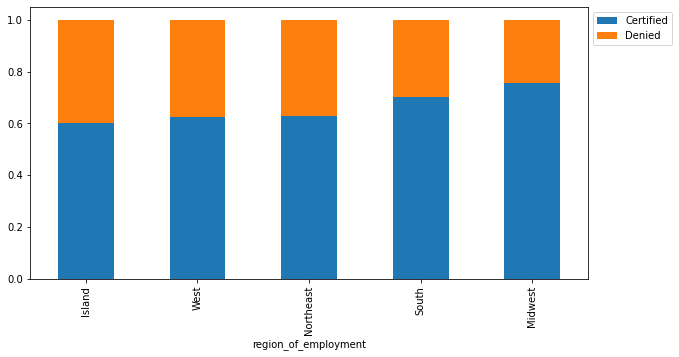

In [50]:
stacked_barplot(data, "region_of_employment", "case_status")

* The applicants applying for jobs in the south and midwest regions have a higher approval rate when compared to those applying for jobs in the island regions , west and northeast regions.

case_status              Certified  Denied    All
company_size                                     
All                          17001    8446  25447
micro_sized(0-1000)           4091    2117   6208
small_sized(1000-2000)        3878    2037   5915
medium_sized(2000-3000)       3330    1648   4978
very_large(4000+)             3361    1437   4798
large(3000-4000)              2341    1207   3548
------------------------------------------------------------------------------------------------------------------------


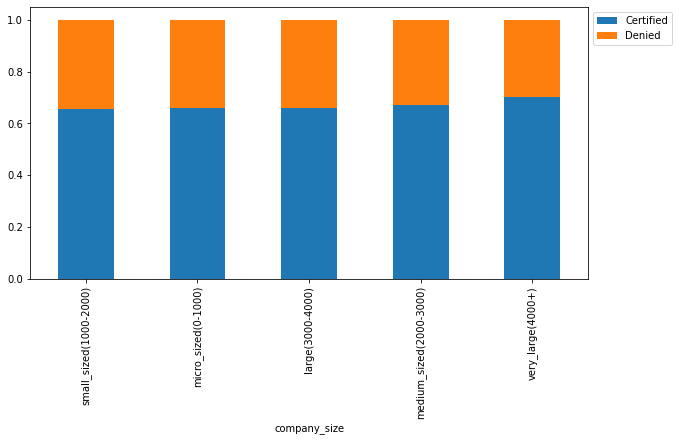

In [51]:
stacked_barplot(data, "company_size", "case_status")

* size of company offering employment  does not have a significant impact on the applicants approval or denial chances. 

### Data Preparation For Modelling 

In [52]:
data_1 = data.copy()

In [53]:
#drop the columns that have been asigned categorical  bins  
data_2 = data_1.drop(labels=['no_of_employees','yr_of_estab'], axis=1, inplace=True)

In [54]:
# hot encode case status so certified=1 and denied=0
data_1["case_status"] = data_1["case_status"].apply(lambda x: 0 if x == "Denied" else 1)

In [55]:
data_1.head()

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_size,age_of_company
0,Asia,High School,N,N,West,592.2029,Hourly,Y,0,very_large(4000+),0-10
1,Asia,Master's,Y,N,Northeast,83425.6500,Not_Hourly,Y,1,medium_sized(2000-3000),10-20
2,Asia,Bachelor's,N,Y,West,122996.8600,Not_Hourly,Y,0,very_large(4000+),0-10
3,Asia,Bachelor's,N,N,West,83434.0300,Not_Hourly,Y,0,micro_sized(0-1000),50+
4,Africa,Master's,Y,N,South,149907.3900,Not_Hourly,Y,1,small_sized(1000-2000),10-20


In [56]:
X = data_1.drop("case_status", axis=1)
Y = data_1["case_status"]

In [57]:
#create dummy variables
X = pd.get_dummies(X, drop_first=True)

In [58]:
# Splitting data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)
X.head()

,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,...,unit_of_wage_Not_Hourly,full_time_position_Y,company_size_small_sized(1000-2000),company_size_medium_sized(2000-3000),company_size_large(3000-4000),company_size_very_large(4000+),age_of_company_30-50,age_of_company_20-30,age_of_company_10-20,age_of_company_0-10
0,592.2029,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,83425.6500,1,0,0,0,0,0,0,1,1,...,1,1,0,1,0,0,0,0,1,0
2,122996.8600,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
3,83434.0300,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,149907.3900,0,0,0,0,0,0,0,1,1,...,1,1,1,0,0,0,0,0,1,0


In [59]:
X = X.astype(float)

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   prevailing_wage                       25447 non-null  float64
 1   continent_Asia                        25447 non-null  float64
 2   continent_Europe                      25447 non-null  float64
 3   continent_North America               25447 non-null  float64
 4   continent_Oceania                     25447 non-null  float64
 5   continent_South America               25447 non-null  float64
 6   education_of_employee_Doctorate       25447 non-null  float64
 7   education_of_employee_High School     25447 non-null  float64
 8   education_of_employee_Master's        25447 non-null  float64
 9   has_job_experience_Y                  25447 non-null  float64
 10  requires_job_training_Y               25447 non-null  float64
 11  region_of_emplo

In [61]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17812, 25)
Shape of test set :  (7635, 25)
Percentage of classes in training set:
1    0.666798
0    0.333202
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.67112
0    0.32888
Name: case_status, dtype: float64


## Building bagging and boosting models

## **Model** **evaluation** **criterion**

### Model can make wrong predictions as:
1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.

2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### **Which case is more important?**
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

### **How to reduce the losses**?
* F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.




#### ***Let's create functions to calculate different metrics(accuracy, recall, and precision) and confusion matrix. ***

In [62]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )
    return df_perf


In [63]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model


In [64]:
# Fitting the decision tree
dtree = DecisionTreeClassifier(criterion='gini', random_state=1, class_weight='balanced')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

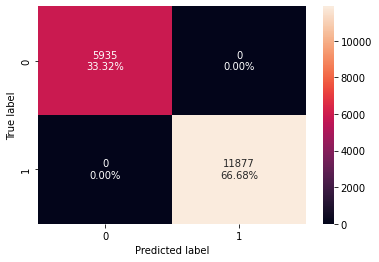

In [65]:
#create a confusion matrix on the training data
confusion_matrix_sklearn(dtree, x_train, y_train)

In [66]:
dtree_model_train_perf = model_performance_classification_sklearn(dtree, x_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


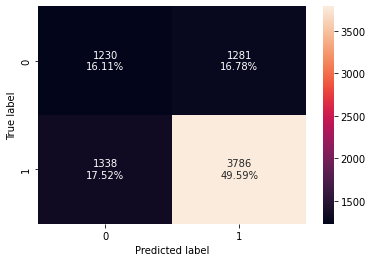

In [67]:
#create a confusion matrix on the testing data
confusion_matrix_sklearn(dtree, x_test, y_test)

In [68]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, x_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.656974  0.738876   0.747188  0.743009


* The model overfits on the training data set as it doesn't do well on the test set and there is a huge disparity on the test set metrics.

### Bagging Classifier

In [69]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

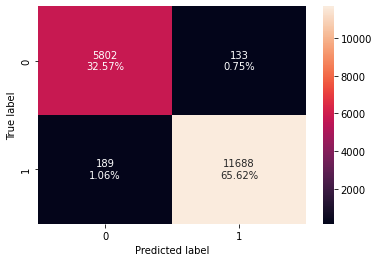

In [70]:
confusion_matrix_sklearn(bagging, x_train, y_train)

In [71]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, x_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.981922  0.984087   0.988749  0.986412


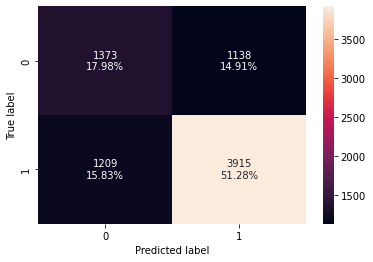

In [72]:
confusion_matrix_sklearn(bagging, x_test, y_test)

In [73]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, x_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0    0.6926  0.764052   0.774787  0.769382


* Bagging classifier is also overfitting on the training set and doesn't perform well on the test set in terms of F1 score, although it generally does better on the test than the decision tree.

### Random Forest

In [74]:
# Fit model
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

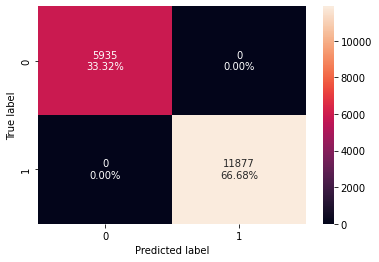

In [75]:
confusion_matrix_sklearn(rf,x_train,y_train)

In [76]:
rf_model_train_perf=model_performance_classification_sklearn(rf,x_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


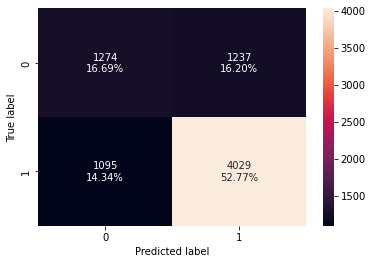

In [77]:
confusion_matrix_sklearn(rf,x_test,y_test)

In [78]:
rf_model_test_perf=model_performance_classification_sklearn(rf,x_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.694565  0.7863   0.765097  0.775553


* The random forest model is overfitting on the test data and doesn't generalize well on the test data but so far sees to be doing the best on the test data using F1 score as point of comparison.

### AdaBoost Classifier

In [79]:
# fit the model
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

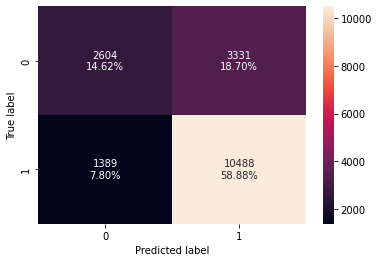

In [80]:
# create the confusion matrix for training set
confusion_matrix_sklearn(ab_classifier, x_train,y_train)

In [81]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,x_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.73501  0.883051   0.758955  0.816314


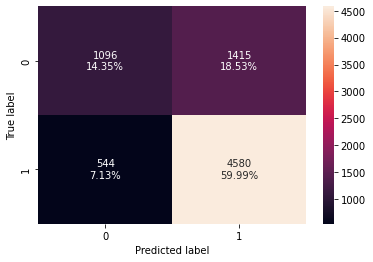

In [82]:
# create the confusion matrix for test set
confusion_matrix_sklearn(ab_classifier, x_test,y_test)

In [83]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,x_test,y_test)
print("Testing performance \n",ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.743418  0.893833    0.76397  0.823815


* The model so far perfoms best on both training and test sets as the metric scores on both sets are very very similar, this indicates that the moel does not overfit.
* The F1 score of the testing set is the highest so far.

### Gradient Boosting Classifier

In [84]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

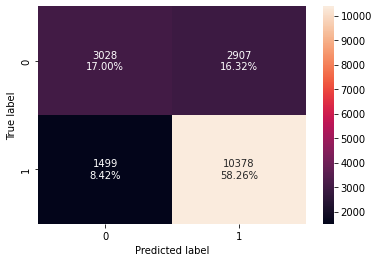

In [85]:
confusion_matrix_sklearn(gbc, x_train,y_train)

In [86]:
gbc_classifier_model_train_perf = model_performance_classification_sklearn(gbc,x_train,y_train)
print("Training performance \n",gbc_classifier_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.752639  0.87379   0.781182  0.824895


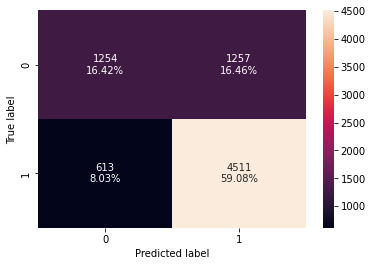

In [87]:
confusion_matrix_sklearn(gbc, x_test,y_test)

In [88]:
gbc_classifier_model_test_perf = model_performance_classification_sklearn(gbc,x_test,y_test)
print("Training performance \n",gbc_classifier_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.755075  0.880367   0.782074  0.828314


* This model does well on both the training and test sets which means the model is not overfitting.
* based on F1 score this model does just slightly better than the Adaboost classifier model.

### XGBoost Classifier

In [89]:
# Fit the model
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(x_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

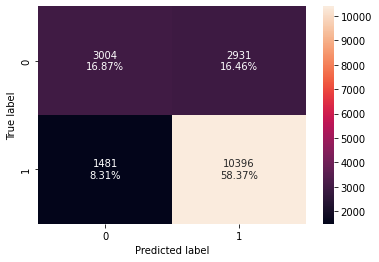

In [90]:
confusion_matrix_sklearn(xgb, x_train,y_train)

In [91]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb,x_train,y_train)
print("Training performance \n",xgb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.752302  0.875305   0.780071  0.824948


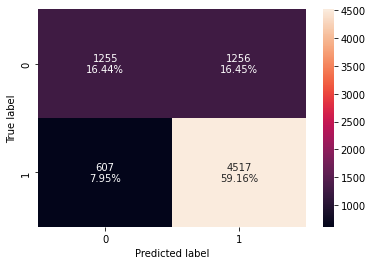

In [92]:
confusion_matrix_sklearn(xgb, x_test,y_test)

In [93]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb,x_test,y_test)
print("Training performance \n",xgb_classifier_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.755992  0.881538   0.782435  0.829036


* This model also perfoms equally well on both the training and the test sets which means the model is not overfitting.
* This model performs equally as well as the gradient boost model performed using the F1 score for comparison.

### Base models comparison

In [94]:
# create a dataframe comparing the performance of the base models on the training data

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,
     bagging_model_train_perf.T,
     rf_model_train_perf.T,
     ab_classifier_model_train_perf.T, 
     gbc_classifier_model_train_perf.T, 
     xgb_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Training performance comparison of base models:")
models_train_comp_df

Training performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,1.0,0.981922,1.0,0.735010,0.752639,0.752302
Recall,1.0,0.984087,1.0,0.883051,0.873790,0.875305
Precision,1.0,0.988749,1.0,0.758955,0.781182,0.780071
F1,1.0,0.986412,1.0,0.816314,0.824895,0.824948


In [95]:
# create a dataframe comparing the performance of the base models on the testing data

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,
     bagging_model_test_perf.T,
     rf_model_test_perf.T,
     ab_classifier_model_test_perf.T, 
     gbc_classifier_model_test_perf.T, 
     xgb_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Testing performance comparison of base models:")
models_test_comp_df

Testing performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.656974,0.692600,0.694565,0.743418,0.755075,0.755992
Recall,0.738876,0.764052,0.786300,0.893833,0.880367,0.881538
Precision,0.747188,0.774787,0.765097,0.763970,0.782074,0.782435
F1,0.743009,0.769382,0.775553,0.823815,0.828314,0.829036


* From the above comprison, we an see that the boosting models perform better on the test sets than the bagging models as they do not overfit on training sets.
* The bagging models (bagging classifier and random forest) overfit on the testing sets but perform poorly on the tsting set.
* Overrall, based on F1 scoe, the XGBoost classifier performs the best amongst all models.

##  Will tuning the hyperparameters improve the model performance?

### Hyperparameter tuning

**Tuning Decision Tree**

In [96]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(5,30,5),
              'min_samples_leaf': [3, 5, 7],
              'max_leaf_nodes' : [2, 4, 6],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

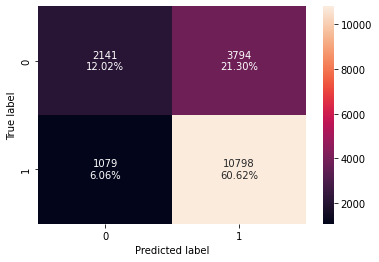

In [97]:
confusion_matrix_sklearn(dtree_estimator, x_train,y_train)

In [98]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, x_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.72642  0.909152   0.739995  0.815898


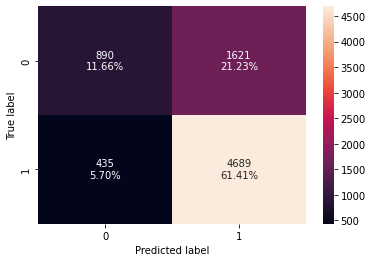

In [99]:
confusion_matrix_sklearn(dtree_estimator, x_test,y_test)

In [100]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, x_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.730714  0.915105   0.743106  0.820185


* The tuned decision tree does well on both the training and test sets indicating that it is not oerfitting.
* The tuned model performs significantly better than the base model indicating that tuning improved the base model.

### Bagging - Hyperparameter Tuning

In [101]:
# random search for bagging classifier
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : np.arange(50, 100, 10)
             }

#run the randomized search
rand_bag = RandomizedSearchCV(BaggingClassifier(random_state=1,bootstrap=True), 
                              parameters, scoring = 'f1', cv = 5, random_state=1)
rand_bag = rand_bag.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bag_tuned = rand_bag.best_estimator_

# Fit the best algorithm to the data
bag_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.8, n_estimators=70,
                  random_state=1)

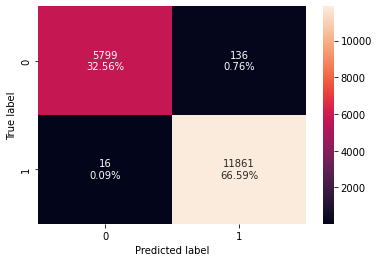

In [102]:
confusion_matrix_sklearn(bag_tuned, x_train,y_train)

In [103]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bag_tuned, x_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.991466  0.998653   0.988664  0.993633


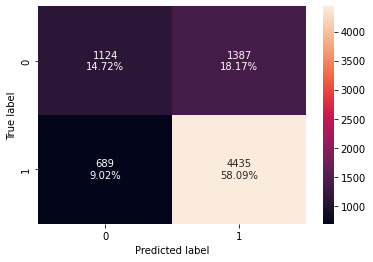

In [104]:
confusion_matrix_sklearn(bag_tuned, x_test,y_test)

In [105]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bag_tuned, x_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.728094  0.865535   0.761766  0.810342


* Although the tuned bagging model does better than the base model when comparing F1 scores, the hypertuned model is still overfitting on the training data.

### Random Forest - Hyperparameter tuning

In [106]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10, 40, 10),
              "min_samples_leaf": np.arange(5, 10),
              "min_samples_split": [3, 5, 7],
              "max_features": ["sqrt", "log2"],
              "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Run the randomized search
rand_rf = RandomizedSearchCV(rf_estimator, parameters, scoring='f1', cv=5, n_jobs=-1, random_state=1)
rand_rf = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = rand_rf.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

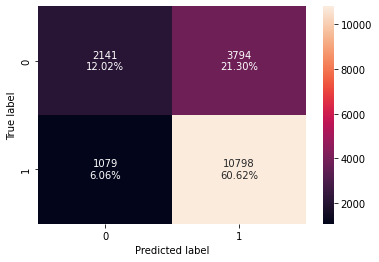

In [107]:
confusion_matrix_sklearn(rf_estimator, x_train,y_train)

In [108]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.72642  0.909152   0.739995  0.815898


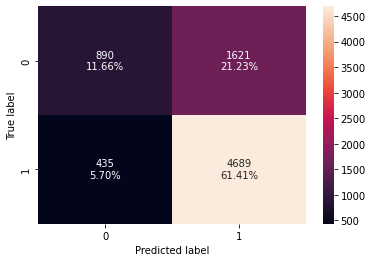

In [109]:
confusion_matrix_sklearn(rf_estimator, x_test,y_test)

In [110]:

rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, x_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.730714  0.915105   0.743106  0.820185


* The tuned random forest model does well on both the training and test sets indicating that it is not oerfitting.
* The tuned model performs significantly better than the base model indicating that hypertuning improved the base random forest model.

### AdaBoost - Hyperparamter tuning

In [111]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=2, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=3, random_state=1, class_weight='balanced')],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_abc = RandomizedSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1, random_state=1)
rand_abc = rand_abc.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = rand_abc.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.5, n_estimators=20, random_state=1)

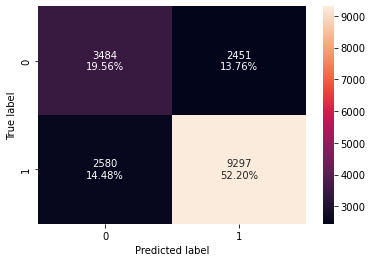

In [112]:
confusion_matrix_sklearn(abc_tuned, x_train,y_train)

In [113]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, x_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.71755  0.782773   0.791369  0.787048


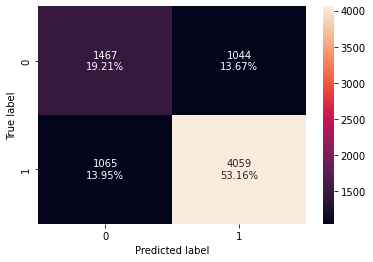

In [114]:
confusion_matrix_sklearn(abc_tuned, x_test,y_test)

In [115]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, x_test, y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.723772  0.792155   0.795414  0.793781


* Similar to the base model the tuned Adaboost model does well on both the training and the test data and does not overfit on the training data.
* However based on F1 score comparison, the tuned model does worse than the base model which indicates that there was no improvement.

### Gradient Boosting - Hyperparameter Tuning

In [116]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250,300],
              "subsample":[0.8,0.9,1],
              "max_features":[0.7,0.8,0.9,1],
              "learning_rate": np.arange(0.1, 0.4, 0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_gb = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_gb = rand_gb.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = rand_gb.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_features=0.9, n_estimators=300, random_state=1,
                           subsample=1)

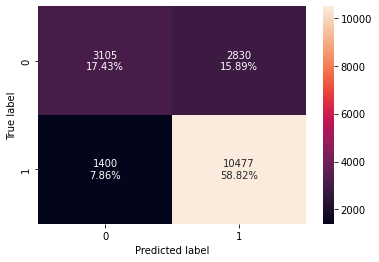

In [117]:
confusion_matrix_sklearn(gb_tuned, x_train,y_train)

In [118]:
gb_tuned_model_train_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.72642  0.909152   0.739995  0.815898


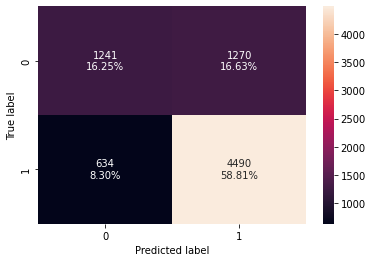

In [119]:
confusion_matrix_sklearn(gb_tuned, x_test,y_test)

In [120]:
gb_tuned_model_test_perf=model_performance_classification_sklearn(rf_estimator, x_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.730714  0.915105   0.743106  0.820185


* Similar to the base model the tuned gradient boosteing model does well on both the training and the test data and does not overfit on the training data.
* Based on F1 score comparison, the tuned model does just slightly worse than the base model indicating there was no improvement.

###  XGBoost - Hyperparameter tuning

In [121]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10,100,20),
              "scale_pos_weight":[0,1,2,5],
              "subsample":[0.5,0.7,0.9,1],
              "learning_rate":[0.01,0.1,0.2,0.05],
              "gamma":[0,1,3],
              "colsample_bytree":[0.5,0.7,0.9,1],
              "colsample_bylevel":[0.5,0.7,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_xgb = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_xgb = rand_xgb.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = rand_xgb.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(x_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.5,
              eval_metric='logloss', n_estimators=70, random_state=1,
              subsample=0.7)

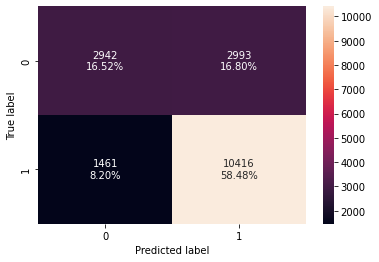

In [122]:
confusion_matrix_sklearn(xgb_tuned, x_train,y_train)

In [123]:
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned, x_train,y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.749944  0.876989   0.776792  0.823855


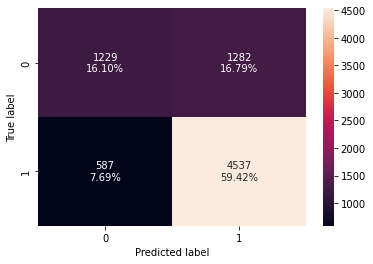

In [124]:
confusion_matrix_sklearn(xgb_tuned, x_test,y_test)

In [125]:
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned, x_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.755206  0.885441   0.779687  0.829206


* Similar to the base model the tuned xgboosting model does well on both the training and the test data and does not overfit on the training data.
* Based on F1 score comparison, the tuned model does just slightly betterthan  the base model indicating there was non significant improvement to base model.

In [126]:
# create a dataframe comparing the performance of the tuned models on the training data

tuned_models_train_comp_df = pd.concat(
    [dtree_estimator_model_train_perf.T,
     bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T,
     abc_tuned_model_train_perf.T, 
     gb_tuned_model_train_perf.T, 
     xgb_tuned_model_train_perf.T],
    axis=1,
)
tuned_models_train_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Training performance comparison of tuned models:")
tuned_models_train_comp_df

Training performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.726420,0.991466,0.726420,0.717550,0.726420,0.749944
Recall,0.909152,0.998653,0.909152,0.782773,0.909152,0.876989
Precision,0.739995,0.988664,0.739995,0.791369,0.739995,0.776792
F1,0.815898,0.993633,0.815898,0.787048,0.815898,0.823855


In [127]:
# create a dataframe comparing the performance of the tuned models on the testing data

tuned_models_test_comp_df = pd.concat(
    [dtree_estimator_model_test_perf.T,
     bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T,
     abc_tuned_model_test_perf.T, 
     gb_tuned_model_test_perf.T, 
     xgb_tuned_model_test_perf.T],
    axis=1,
)
tuned_models_test_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Testing performance comparison of tuned models:")
tuned_models_test_comp_df

Testing performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.730714,0.728094,0.730714,0.723772,0.730714,0.755206
Recall,0.915105,0.865535,0.915105,0.792155,0.915105,0.885441
Precision,0.743106,0.761766,0.743106,0.795414,0.743106,0.779687
F1,0.820185,0.810342,0.820185,0.793781,0.820185,0.829206


## Model Performance Comparison and Conclusions

In [128]:
# create a dataframe comparing the performance of all models on the training data with F1 score in descending order
all_models_train_comp = pd.concat([models_train_comp_df,tuned_models_train_comp_df],axis=1)
all_models_train_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Decision Tree,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000
Tuned Bagging Classifier,0.991466,0.998653,0.988664,0.993633
Bagging Classifier,0.981922,0.984087,0.988749,0.986412
XGBoost Classifier,0.752302,0.875305,0.780071,0.824948
Gradient Boosting Classifier,0.752639,0.873790,0.781182,0.824895
Tuned XGBoost Classifier,0.749944,0.876989,0.776792,0.823855
AdaBoost Classifier,0.735010,0.883051,0.758955,0.816314
Tuned Decision Tree,0.726420,0.909152,0.739995,0.815898
Tuned Random Forest,0.726420,0.909152,0.739995,0.815898


In [129]:
# create a dataframe comparing the performance of all models on the testing data with F1 score in descending order
all_models_test_comp = pd.concat([models_test_comp_df,tuned_models_test_comp_df],axis=1)
all_models_test_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Tuned XGBoost Classifier,0.755206,0.885441,0.779687,0.829206
XGBoost Classifier,0.755992,0.881538,0.782435,0.829036
Gradient Boosting Classifier,0.755075,0.880367,0.782074,0.828314
AdaBoost Classifier,0.743418,0.893833,0.763970,0.823815
Tuned Decision Tree,0.730714,0.915105,0.743106,0.820185
Tuned Random Forest,0.730714,0.915105,0.743106,0.820185
Tuned Gradient Boosting Classifier,0.730714,0.915105,0.743106,0.820185
Tuned Bagging Classifier,0.728094,0.865535,0.761766,0.810342
Tuned AdaBoost Classifier,0.723772,0.792155,0.795414,0.793781
Random Forest,0.694565,0.786300,0.765097,0.775553


* Decision tree, Random forest model,Bagging classifier model and Tuned Bagging classifier model overfit the data on the training set but did poorly on the test set
* Generally the boosting classifiers( AdaBoost classifier, Gradient Boosting classifier, XGBoost classifier) did better than the bagging clasifiers.
* The tuned XGBoost classifier performed the best on the test set as it has the highest F1 score followed by the boosting clasifiers. 
* Tuning improved the badding classifier, decision tree and Random forest models but did not improve the Gradient boosting classifier and AdaBoost classifier models.

In [130]:
feature_names = x_train.columns

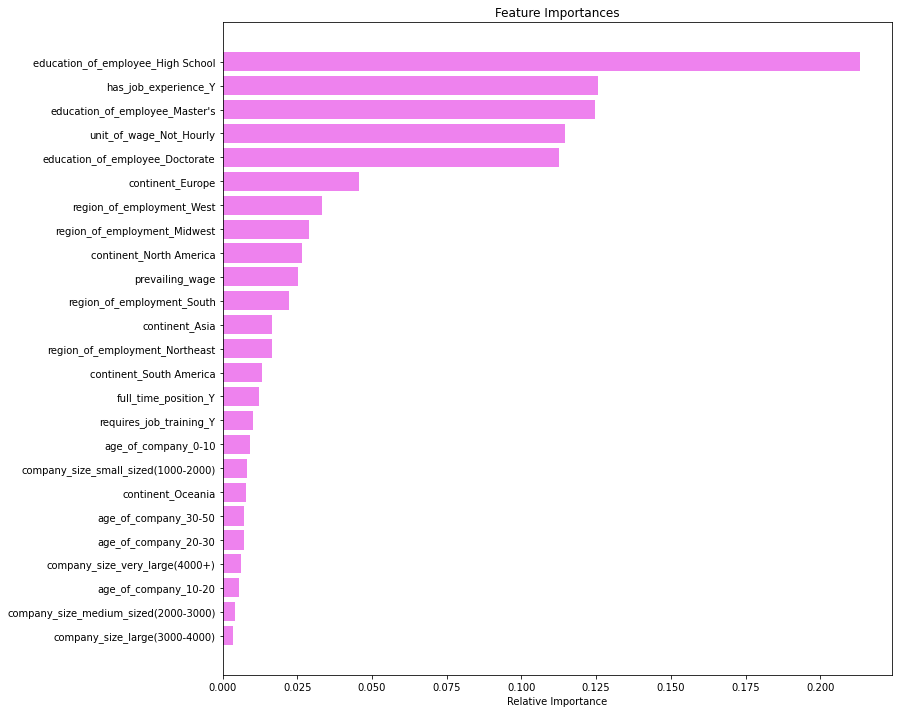

In [132]:
# importance/hierachy of features in the tree building
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

* The tuned XGBoost classifier model performed the best out of all models in classifying Visa applicants as it generalised very well on both the training and test sets with the highest acccuracy and F1 score. 
* The following features/criterias have been identified to play an important role in the visa process( they determine whether a person's visa application would be certified or denied)

   *  Educational qualification of applicant: Applicants with higher edcational levels like a master's degree and Doctorste degree and applying for jobs in need of those qualifications are more likely to be certified than those with just a high school diploma.
   * Prior job experience(s): Applicants applying for jobs with prior job experience(s) are more likely to be certified than those applying with no prior job experience.

 *  Unit of wage: Applicants applying for jobs with non-hourly wages (weekly, monthly and yearly unit of wages), especially those earning anual salaries are more likely to be certified than those earning hourly.

* In order for the OFCL to prioritise applications that are more likely to be approved and issue certification, the above metrics/ feautures should be used in sorting out applications using the tuned XGBoost classifier model to categorise this applicants.











